In [1]:
import os
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

C:\Users\vikto\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# reading raw aggreagted data
raw_data = pd.read_csv('./Data/total.csv', sep='\t')
raw_data

Account ID     Summoner Name  \
0     sizESsMeLrUCpNE9m_TbFbEERhlAZTi0XpTp5f57-UXl9P8     ElectricHuman   
1     BrhKmm-z0AwQeVlQ33iCVskpUgxj7DUtYNjig-J15mvm4X0      Витя Булдыга   
2     tBvHdFdOGJUzgcFPksrhVL-T5H5j_TsxU6FiHZ1LBwT-K98  LisichkinVitamin   
3     VdZnAy-jwOR9De8qjhlBuDOb7qVeWtqn_5x73EbPGkJjOgs       Feed Expert   
4     CQ9vV00bIB3lCjx_CB2HvkUNW93xK0QBzPlZpqotH_4UOrM       NoobsCanFly   
...                                               ...               ...   
2043  c9thbKmxp4WgOl5oLbbGOZvtYjSEEtJ5yZIb5MpQguRcrOs        SCP Yasuo    
2044  Ap_0lRmhK6KwILqMiSOvW6Eju6RuSIJiJRfNQprHEcca9wM         кайс о4ка   
2045  UCKg8rV5dtJtZ51Sd5G3s-jZ5LJKHCiFCKcXgZsgN5z5Zfw      Envy Kitsune   
2046  A5tt6JLjbCmGohzaxHxkpV-e3mOjEic2QdaJWgCvDHn9cSI            Кертон   
2047  AswWht_WysfpCBtbit6epBG3rXY2WrV8mkxv-nVm-j12kog        shock dart   

            Rank       Role    Lane  Wins  kills  deaths  assists  goldEarned  \
0       SILVER I  DUO_CARRY  BOTTOM    55   8.71    5.81     9.44    12163.21   
1       SILVER I       SOLO     MID    47   5.21    7.17     8.49     9690.51   
2       SILVER I  DUO_CARRY  BOTTOM    49   5.98    5.87     8.91    10641.44   
3       SILVER I       SOLO     MID    55  10.03    6.70     6.27    11854.38   
4       SILVER I       SOLO     TOP    62   7.06    3.20     7.85    11246.44   
...          ...        ...     ...   ...    ...     ...      ...         ...   
2043  DIAMOND IV       SOLO     TOP    48   5.35    6.88     6.30     9982.10   
2044  DIAMOND IV       NONE  JUNGLE    61   9.12    5.46     7.39    12935.31   
2045  DIAMOND IV       NONE  JUNGLE    52   6.00    6.27     8.01    10004.79   
2046  DIAMOND IV       SOLO     TOP    57   5.67    4.88     5.73    11344.94   
2047  DIAMOND IV  DUO_CARRY  BOTTOM    43   4.76    6.18     7.15     9918.81   

      ...  doubleKills  tripleKills  quadraKills  pentaKills  unrealKills  \
0     ...         1.15         0.16         0.00        0.00          0.0   
1     ...         0.43         0.05         0.01        0.00          0.0   
2     ...         0.58         0.12         0.01        0.01          0.0   
3     ...         1.07         0.15         0.01        0.00          0.0   
4     ...         0.54         0.05         0.01        0.01          0.0   
...   ...          ...          ...          ...         ...          ...   
2043  ...         0.34         0.05         0.00        0.00          0.0   
2044  ...         1.28         0.20         0.05        0.00          0.0   
2045  ...         0.62         0.10         0.02        0.00          0.0   
2046  ...         0.56         0.11         0.01        0.00          0.0   
2047  ...         0.43         0.06         0.00        0.00          0.0   

      inhibitorKills  turretKills  killingSprees  largestKillingSpree  \
0               0.37         1.63           2.00                 4.05   
1               0.07         0.65           1.21                 2.26   
2               0.25         0.92           1.33                 2.74   
3               0.12         0.97           2.29                 3.93   
4               0.17         1.18           1.43                 4.36   
...              ...          ...            ...                  ...   
2043            0.24         0.98           1.25                 2.27   
2044            0.27         1.56           2.02                 4.39   
2045            0.21         1.02           1.50                 2.58   
2046            0.28         1.66           1.26                 2.84   
2047            0.15         1.09           1.14                 2.19   

      largestMultiKill  
0                 1.69  
1                 1.30  
2                 1.41  
3                 1.64  
4                 1.36  
...                ...  
2043              1.29  
2044              1.89  
2045              1.35  
2046              1.32  
2047              1.26  

[2048 rows x 52 columns]

In [3]:
# dropping columns that are not used for clusterization
data = raw_data.drop(columns=['Account ID', 'Summoner Name', 'Rank', 'Role', 'Lane', 'Wins'])
data

kills  deaths  assists  goldEarned  goldSpent  magicDamageDealt  \
0      8.71    5.81     9.44    12163.21   11161.15           9224.69   
1      5.21    7.17     8.49     9690.51    8783.31          70560.43   
2      5.98    5.87     8.91    10641.44    9872.07          22786.05   
3     10.03    6.70     6.27    11854.38   10737.40          22846.53   
4      7.06    3.20     7.85    11246.44   10866.31          60769.30   
...     ...     ...      ...         ...        ...               ...   
2043   5.35    6.88     6.30     9982.10    9129.55          40715.27   
2044   9.12    5.46     7.39    12935.31   11660.81          17995.61   
2045   6.00    6.27     8.01    10004.79    9161.27          25604.02   
2046   5.67    4.88     5.73    11344.94   10277.50          47622.22   
2047   4.76    6.18     7.15     9918.81    9222.86          21439.73   

      magicDamageDealtToChampions  magicalDamageTaken  physicalDamageDealt  \
0                         3037.70             6724.00            105582.81   
1                        15924.49             7314.92             15122.69   
2                         4783.13             7360.71             70580.41   
3                         3710.37             7723.03            100235.49   
4                        13631.32             7246.68             55560.22   
...                           ...                 ...                  ...   
2043                      7940.09             8958.94             54751.39   
2044                      2059.46             8797.11            152721.70   
2045                      5000.48             6590.88             69376.41   
2046                      7558.70             8364.39             85358.64   
2047                      4382.07             6578.42             77715.63   

      physicalDamageDealtToChampions  ...  doubleKills  tripleKills  \
0                           18202.90  ...         1.15         0.16   
1                            1905.88  ...         0.43         0.05   
2                           10136.82  ...         0.58         0.12   
3                           17468.62  ...         1.07         0.15   
4                            7192.43  ...         0.54         0.05   
...                              ...  ...          ...          ...   
2043                         9029.41  ...         0.34         0.05   
2044                        17816.09  ...         1.28         0.20   
2045                         8626.64  ...         0.62         0.10   
2046                         9752.34  ...         0.56         0.11   
2047                         9271.77  ...         0.43         0.06   

      quadraKills  pentaKills  unrealKills  inhibitorKills  turretKills  \
0            0.00        0.00          0.0            0.37         1.63   
1            0.01        0.00          0.0            0.07         0.65   
2            0.01        0.01          0.0            0.25         0.92   
3            0.01        0.00          0.0            0.12         0.97   
4            0.01        0.01          0.0            0.17         1.18   
...           ...         ...          ...             ...          ...   
2043         0.00        0.00          0.0            0.24         0.98   
2044         0.05        0.00          0.0            0.27         1.56   
2045         0.02        0.00          0.0            0.21         1.02   
2046         0.01        0.00          0.0            0.28         1.66   
2047         0.00        0.00          0.0            0.15         1.09   

      killingSprees  largestKillingSpree  largestMultiKill  
0              2.00                 4.05              1.69  
1              1.21                 2.26              1.30  
2              1.33                 2.74              1.41  
3              2.29                 3.93              1.64  
4              1.43                 4.36              1.36  
...             ...                  ...               ...  
2043       

In [4]:
# a bit of featire engineering
data['magicDamageDealtToOthers'] = data['magicDamageDealt'] - data['magicDamageDealtToChampions']
data['physicalDamageDealtToOthers'] = data['physicalDamageDealt'] - data['physicalDamageDealtToChampions']
data['trueDamageDealtToOthers'] = data['trueDamageDealt'] - data['trueDamageDealtToChampions']
data = data.drop(columns=['magicDamageDealt', 'physicalDamageDealt', 'trueDamageDealt', 'totalDamageDealtToChampions', 
                         'totalDamageDealt', 'totalDamageTaken'])
data

kills  deaths  assists  goldEarned  goldSpent  \
0      8.71    5.81     9.44    12163.21   11161.15   
1      5.21    7.17     8.49     9690.51    8783.31   
2      5.98    5.87     8.91    10641.44    9872.07   
3     10.03    6.70     6.27    11854.38   10737.40   
4      7.06    3.20     7.85    11246.44   10866.31   
...     ...     ...      ...         ...        ...   
2043   5.35    6.88     6.30     9982.10    9129.55   
2044   9.12    5.46     7.39    12935.31   11660.81   
2045   6.00    6.27     8.01    10004.79    9161.27   
2046   5.67    4.88     5.73    11344.94   10277.50   
2047   4.76    6.18     7.15     9918.81    9222.86   

      magicDamageDealtToChampions  magicalDamageTaken  \
0                         3037.70             6724.00   
1                        15924.49             7314.92   
2                         4783.13             7360.71   
3                         3710.37             7723.03   
4                        13631.32             7246.68   
...                           ...                 ...   
2043                      7940.09             8958.94   
2044                      2059.46             8797.11   
2045                      5000.48             6590.88   
2046                      7558.70             8364.39   
2047                      4382.07             6578.42   

      physicalDamageDealtToChampions  physicalDamageTaken  \
0                           18202.90             10579.71   
1                            1905.88             11210.83   
2                           10136.82             12466.79   
3                           17468.62             15888.75   
4                            7192.43             11421.30   
...                              ...                  ...   
2043                         9029.41             15611.90   
2044                        17816.09             19598.56   
2045                         8626.64             13136.75   
2046                         9752.34             15718.01   
2047                         9271.77             10871.97   

      trueDamageDealtToChampions  ...  pentaKills  unrealKills  \
0                         522.08  ...        0.00          0.0   
1                        1218.53  ...        0.00          0.0   
2                        1433.90  ...        0.01          0.0   
3                        1194.59  ...        0.00          0.0   
4                        1542.59  ...        0.01          0.0   
...                          ...  ...         ...          ...   
2043                     1599.40  ...        0.00          0.0   
2044                     1471.94  ...        0.00          0.0   
2045                     1378.04  ...        0.00          0.0   
2046                      922.40  ...        0.00          0.0   
2047                      538.59  ...        0.00          0.0   

      inhibitorKills  turretKills  killingSprees  largestKillingSpree  \
0               0.37         1.63           2.00                 4.05   
1               0.07         0.65           1.21                 2.26   
2               0.25         0.92           1.33                 2.74   
3               0.12         0.97           2.29                 3.93   
4               0.17         1.18           1.43                 4.36   
...              ...          ...            ...                  ...   
2043            0.24         0.98           1.25                 2.27   
2044            0.27         1.56           2.02                 4.39   
2045            0.21         1.02           1.50                 2.58   
2046            0.28         1.66           1.26                 2.84   
2047            0.15         1.09           1.14                 2.19   

      largestMultiKill  magicDamageDealtToOthers  physicalDamageDealtToOthers  \
0                 1.69                   6186.99                     87379.91   
1                 1.30                  54635.94                     13216.81   
2             

In [5]:
# removing data with standard deviation less than 0.5 as uninformative
s = data.std()
s = s[round(s) != 0]
work = data[list(s.index)]
work

kills  deaths  assists  goldEarned  goldSpent  \
0      8.71    5.81     9.44    12163.21   11161.15   
1      5.21    7.17     8.49     9690.51    8783.31   
2      5.98    5.87     8.91    10641.44    9872.07   
3     10.03    6.70     6.27    11854.38   10737.40   
4      7.06    3.20     7.85    11246.44   10866.31   
...     ...     ...      ...         ...        ...   
2043   5.35    6.88     6.30     9982.10    9129.55   
2044   9.12    5.46     7.39    12935.31   11660.81   
2045   6.00    6.27     8.01    10004.79    9161.27   
2046   5.67    4.88     5.73    11344.94   10277.50   
2047   4.76    6.18     7.15     9918.81    9222.86   

      magicDamageDealtToChampions  magicalDamageTaken  \
0                         3037.70             6724.00   
1                        15924.49             7314.92   
2                         4783.13             7360.71   
3                         3710.37             7723.03   
4                        13631.32             7246.68   
...                           ...                 ...   
2043                      7940.09             8958.94   
2044                      2059.46             8797.11   
2045                      5000.48             6590.88   
2046                      7558.70             8364.39   
2047                      4382.07             6578.42   

      physicalDamageDealtToChampions  physicalDamageTaken  \
0                           18202.90             10579.71   
1                            1905.88             11210.83   
2                           10136.82             12466.79   
3                           17468.62             15888.75   
4                            7192.43             11421.30   
...                              ...                  ...   
2043                         9029.41             15611.90   
2044                        17816.09             19598.56   
2045                         8626.64             13136.75   
2046                         9752.34             15718.01   
2047                         9271.77             10871.97   

      trueDamageDealtToChampions  ...  totalMinionsKilled  \
0                         522.08  ...              133.21   
1                        1218.53  ...              104.12   
2                        1433.90  ...              101.92   
3                        1194.59  ...              113.56   
4                        1542.59  ...              122.53   
...                          ...  ...                 ...   
2043                     1599.40  ...              122.47   
2044                     1471.94  ...               90.50   
2045                     1378.04  ...               27.42   
2046                      922.40  ...              159.12   
2047                      538.59  ...              115.33   

      neutralMinionsKilled  largestCriticalStrike  \
0                     9.22                 694.93   
1                     6.60                   2.20   
2                    24.97                 342.01   
3                    42.52                 168.39   
4                    22.29                  87.24   
...                    ...                    ...   
2043                  6.32                 112.24   
2044                105.41                 346.39   
2045                 71.55                  22.64   
2046                 22.08                  73.22   
2047                 22.04                 282.87   

      neutralMinionsKilledTeamJungle  neutralMinionsKilledEnemyJungle  \
0                               4.38                             1.27   
1                               4.30                             0.48   
2                              16.58                             1.96   
3                              27.46                             4.51   
4                              11.25                             2.22   
...                              ...                              ...   
2043                            2.75          

In [6]:
# MinMaxScaler of the data
min_max_scaler = MinMaxScaler()
scaled_values = min_max_scaler.fit_transform(work.values)
scaled_data = pd.DataFrame(scaled_values)
scaled_data.columns = work.columns
scaled_data

kills    deaths   assists  goldEarned  goldSpent  \
0     0.596169  0.371227  0.413361    0.729942   0.697268   
1     0.327969  0.508048  0.347251    0.421771   0.419868   
2     0.386973  0.377264  0.376479    0.540285   0.546883   
3     0.697318  0.460765  0.192763    0.691453   0.647833   
4     0.469732  0.108652  0.302714    0.615685   0.662872   
...        ...       ...       ...         ...        ...   
2043  0.338697  0.478873  0.194850    0.458111   0.460261   
2044  0.627586  0.336016  0.270703    0.826168   0.755558   
2045  0.388506  0.417505  0.313848    0.460939   0.463961   
2046  0.363218  0.277666  0.155184    0.627961   0.594181   
2047  0.293487  0.408451  0.254001    0.450224   0.471146   

      magicDamageDealtToChampions  magicalDamageTaken  \
0                        0.111413            0.439490   
1                        0.614919            0.500542   
2                        0.179610            0.505273   
3                        0.137696            0.542707   
4                        0.525322            0.493492   
...                           ...                 ...   
2043                     0.302957            0.670398   
2044                     0.073192            0.653678   
2045                     0.188102            0.425736   
2046                     0.288056            0.608970   
2047                     0.163940            0.424449   

      physicalDamageDealtToChampions  physicalDamageTaken  \
0                           0.719535             0.335793   
1                           0.059754             0.367059   
2                           0.392982             0.429279   
3                           0.689808             0.598804   
4                           0.273779             0.377486   
...                              ...                  ...   
2043                        0.348149             0.585089   
2044                        0.703876             0.782589   
2045                        0.331843             0.462469   
2046                        0.377416             0.590345   
2047                        0.357961             0.350272   

      trueDamageDealtToChampions  ...  totalMinionsKilled  \
0                       0.089297  ...            0.656208   
1                       0.221414  ...            0.504333   
2                       0.262269  ...            0.492847   
3                       0.216872  ...            0.553618   
4                       0.282888  ...            0.600449   
...                          ...  ...                 ...   
2043                    0.293665  ...            0.600136   
2044                    0.269485  ...            0.433225   
2045                    0.251673  ...            0.103895   
2046                    0.165238  ...            0.791480   
2047                    0.092429  ...            0.562859   

      neutralMinionsKilled  largestCriticalStrike  \
0                 0.057542               0.683509   
1                 0.040810               0.002164   
2                 0.158130               0.336389   
3                 0.270213               0.165622   
4                 0.141014               0.085806   
...                    ...                    ...   
2043              0.039022               0.110395   
2044              0.671861               0.340697   
2045              0.455614               0.022268   
2046              0.139673               0.072017   
2047              0.139418               0.278221   

      neutralMinionsKilledTeamJungle  neutralMinionsKilledEnemyJungle  \
0                           0.039985                         0.058310   
1                           0.039253                         0.022039   
2                           0.151615                         0.089991   
3                           0.251167                         0.207071   
4                           0.102846                         0.101928   
...                              ...              

In [7]:
# multicollinearity analysis
corr = pd.DataFrame()
for a in list(scaled_data.columns.values):
    for b in list(scaled_data.columns.values):
        corr.loc[a, b] = scaled_data.corr(method='spearman').loc[a, b]
corr

kills    deaths   assists  goldEarned  \
kills                            1.000000  0.139510 -0.445675    0.872861   
deaths                           0.139510  1.000000 -0.060765   -0.003069   
assists                         -0.445675 -0.060765  1.000000   -0.471206   
goldEarned                       0.872861 -0.003069 -0.471206    1.000000   
goldSpent                        0.861765  0.030165 -0.482918    0.986757   
magicDamageDealtToChampions      0.019935  0.019522  0.172866   -0.000622   
magicalDamageTaken               0.394773  0.525842 -0.242546    0.372855   
physicalDamageDealtToChampions   0.665969  0.149409 -0.435195    0.678072   
physicalDamageTaken              0.425515  0.453867 -0.386113    0.416855   
trueDamageDealtToChampions       0.438827  0.141473 -0.209452    0.386226   
trueDamageTaken                  0.390062  0.287105 -0.347646    0.429802   
longestTimeSpentLiving          -0.134240 -0.748688  0.174159   -0.003802   
damageDealtToTurrets             0.514395  0.016469 -0.503075    0.658836   
damageDealtToObjectives          0.546631 -0.008480 -0.419205    0.676539   
totalHeal                        0.137175 -0.000690  0.032011    0.158797   
totalUnitsHealed                -0.362455 -0.117791  0.582406   -0.328075   
visionScore                     -0.373145 -0.345865  0.542422   -0.255157   
wardsPlaced                     -0.439466 -0.205879  0.568569   -0.368277   
wardsKilled                     -0.180007 -0.495721  0.298951   -0.023863   
visionWardsBoughtInGame         -0.198470 -0.461508  0.244297   -0.062530   
totalTimeCrowdControlDealt       0.033104  0.085515  0.073186    0.122351   
damageSelfMitigated              0.175580  0.232049 -0.196889    0.234721   
timeCCingOthers                 -0.364590  0.060820  0.613313   -0.347973   
totalMinionsKilled               0.507241 -0.148725 -0.569225    0.679751   
neutralMinionsKilled             0.433712  0.116481 -0.336787    0.444609   
largestCriticalStrike            0.427679  0.135828 -0.228132    0.434171   
neutralMinionsKilledTeamJungle   0.406725  0.117446 -0.308265    0.403640   
neutralMinionsKilledEnemyJungle  0.532251  0.087984 -0.450122    0.582867   
champLevel                       0.607829 -0.049549 -0.408546    0.808278   
largestKillingSpree              0.911512 -0.192242 -0.449081    0.868816   
magicDamageDealtToOthers         0.164971 -0.030255 -0.132071    0.215063   
physicalDamageDealtToOthers      0.590455  0.033256 -0.545233    0.705915   
trueDamageDealtToOthers          0.313063  0.133425 -0.287905    0.370076   

                                 goldSpent  magicDamageDealtToChampions  \
kills                             0.861765                     0.019935   
deaths                            0.030165                     0.019522   
assists                          -0.482918                     0.172866   
goldEarned                        0.986757                    -0.000622   
goldSpent                         1.000000                     0.001172   
magicDamageDealtToChampions       0.001172                     1.000000   
magicalDamageTaken                0.387657                     0.151459   
physicalDamageDealtToChampions    0.674703                    -0.577653   
physicalDamageTaken               0.435454                    -0.049357   
trueDamageDealtToChampions        0.396346                     0.049967   
trueDamageTaken                   0.449640                     0.044609   
longestTimeSpentLiving           -0.023635                     0.040013   
damageDealtToTurrets              0.647135                    -0.118179   
damageDealtToObjectives           0.665508                    -0.230777   
totalHeal                         0.158370                     0.048074   
totalUnitsHealed                 -0.343562                    -0.184372   
visionScore                      -0.251995                     0.134502   
wardsPlaced                      -0.358464                     0.15

In [8]:
# indentifying features that highly correlate (> 0.8) with other features (> 4)
ss = {}
for a in corr.index:
    for b in corr.columns:
        if a != b and (corr[a][b] > 0.8 or corr[a][b] < -0.8):
            if not a in ss.keys():
                ss[a] = 1
            else:
                ss[a] += 1
            if not b in ss.keys():
                ss[b] = 1
            else:
                ss[b] += 1
ss = {k: v for k, v in sorted(ss.items(), key=lambda item: item[1])}
for k, v in ss.items():
    if v > 4:
        print(k)

kills
largestKillingSpree
goldEarned
goldSpent


<Axes: >

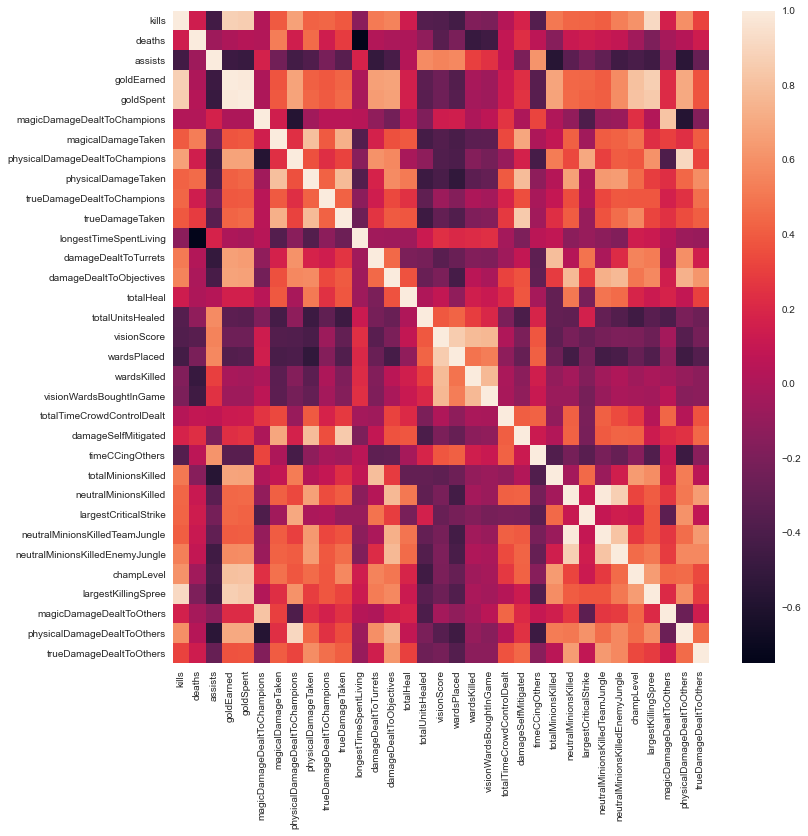

In [9]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr)

In [10]:
# dropping highly correlative columns
scaled_data = scaled_data.drop(columns=['kills', 'goldSpent', 'goldEarned', 'largestKillingSpree'])
scaled_data

deaths   assists  magicDamageDealtToChampions  magicalDamageTaken  \
0     0.371227  0.413361                     0.111413            0.439490   
1     0.508048  0.347251                     0.614919            0.500542   
2     0.377264  0.376479                     0.179610            0.505273   
3     0.460765  0.192763                     0.137696            0.542707   
4     0.108652  0.302714                     0.525322            0.493492   
...        ...       ...                          ...                 ...   
2043  0.478873  0.194850                     0.302957            0.670398   
2044  0.336016  0.270703                     0.073192            0.653678   
2045  0.417505  0.313848                     0.188102            0.425736   
2046  0.277666  0.155184                     0.288056            0.608970   
2047  0.408451  0.254001                     0.163940            0.424449   

      physicalDamageDealtToChampions  physicalDamageTaken  \
0                           0.719535             0.335793   
1                           0.059754             0.367059   
2                           0.392982             0.429279   
3                           0.689808             0.598804   
4                           0.273779             0.377486   
...                              ...                  ...   
2043                        0.348149             0.585089   
2044                        0.703876             0.782589   
2045                        0.331843             0.462469   
2046                        0.377416             0.590345   
2047                        0.357961             0.350272   

      trueDamageDealtToChampions  trueDamageTaken  longestTimeSpentLiving  \
0                       0.089297         0.150440                0.626494   
1                       0.221414         0.196011                0.456885   
2                       0.262269         0.206008                0.560749   
3                       0.216872         0.228603                0.425688   
4                       0.282888         0.189316                0.839730   
...                          ...              ...                     ...   
2043                    0.293665         0.329470                0.288168   
2044                    0.269485         0.550720                0.485382   
2045                    0.251673         0.269817                0.447850   
2046                    0.165238         0.344720                0.593774   
2047                    0.092429         0.153214                0.389224   

      damageDealtToTurrets  ...  timeCCingOthers  totalMinionsKilled  \
0                 0.404694  ...         0.088610            0.656208   
1                 0.197864  ...         0.133314            0.504333   
2                 0.180002  ...         0.135343            0.492847   
3                 0.252989  ...         0.122518            0.553618   
4                 0.301041  ...         0.247645            0.600449   
...                    ...  ...              ...                 ...   
2043              0.248638  ...         0.119765            0.600136   
2044              0.295202  ...         0.130561            0.433225   
2045              0.115261  ...         0.146066            0.103895   
2046              0.417183  ...         0.086654            0.791480   
2047              0.254231  ...         0.107955            0.562859   

      neutralMinionsKilled  largestCriticalStrike  \
0                 0.057542               0.683509   
1                 0.040810               0.002164   
2                 0.158130               0.336389   
3                 0.270213               0.165622   
4                 0.141014               0.085806   
...                    ...                    ...   
2043              0.039022               0.110395   
2044              0.671861               0.340697   
2045              0.455614               0.022268   
2046              0.139673    

In [11]:
plt.rcParams["axes.grid"] = False

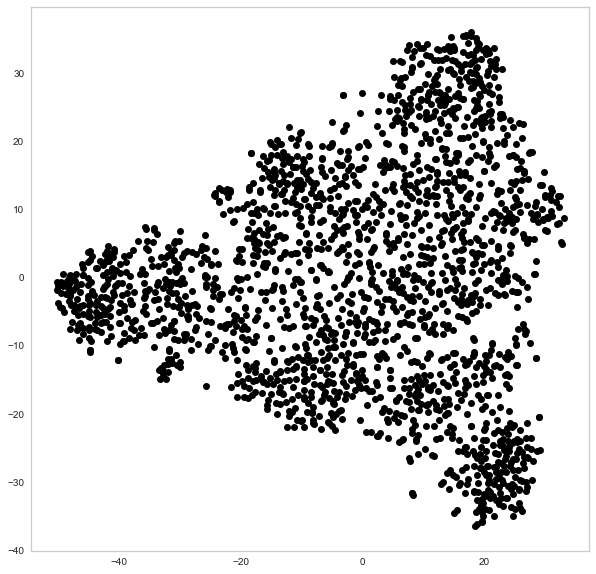

In [12]:
# t-SNE visualization of the data
X_embedded = TSNE(n_components=2, random_state=0, perplexity=50).fit_transform(scaled_data)
plt.figure(figsize=(10, 10))
plt.plot(X_embedded[:, 0], X_embedded[:, 1], 'o', color='black')

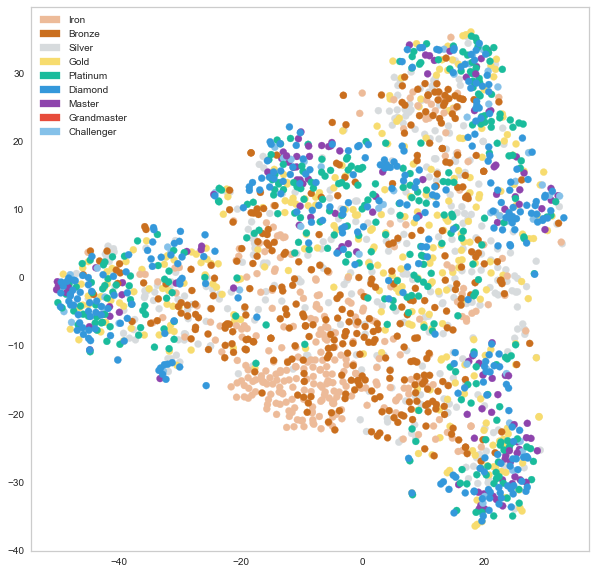

In [13]:
# colored t-SNE visualization according to the rank
rank_colors = []
for i in range(raw_data.shape[0]):
    rank = raw_data['Rank'][i]
    if 'IRON' in rank:
        rank_colors.append('#EDBB99')
    elif 'BRONZE' in rank:
        rank_colors.append('#CA6F1E')
    elif 'SILVER' in rank:
        rank_colors.append('#D7DBDD')
    elif 'GOLD' in rank:
        rank_colors.append('#F7DC6F')
    elif 'PLATINUM' in rank:
        rank_colors.append('#1ABC9C')
    elif 'DIAMOND' in rank:
        rank_colors.append('#3498DB')
    elif 'MASTER' in rank:
        rank_colors.append('#8E44AD')
    elif 'GRANDMASTER' in rank:
        rank_colors.append('#E74C3C')
    elif 'CHALLENGER' in rank:
        rank_colors.append('#85C1E9')

plt.figure(figsize=(10, 10))

plt.legend(handles=[
    mpatches.Patch(color='#EDBB99', label='Iron'),
    mpatches.Patch(color='#CA6F1E', label='Bronze'),
    mpatches.Patch(color='#D7DBDD', label='Silver'),
    mpatches.Patch(color='#F7DC6F', label='Gold'),
    mpatches.Patch(color='#1ABC9C', label='Platinum'),
    mpatches.Patch(color='#3498DB', label='Diamond'),
    mpatches.Patch(color='#8E44AD', label='Master'),
    mpatches.Patch(color='#E74C3C', label='Grandmaster'),
    mpatches.Patch(color='#85C1E9', label='Challenger')
])


plt.scatter(X_embedded[:, 0], X_embedded[:, 1], color=rank_colors)

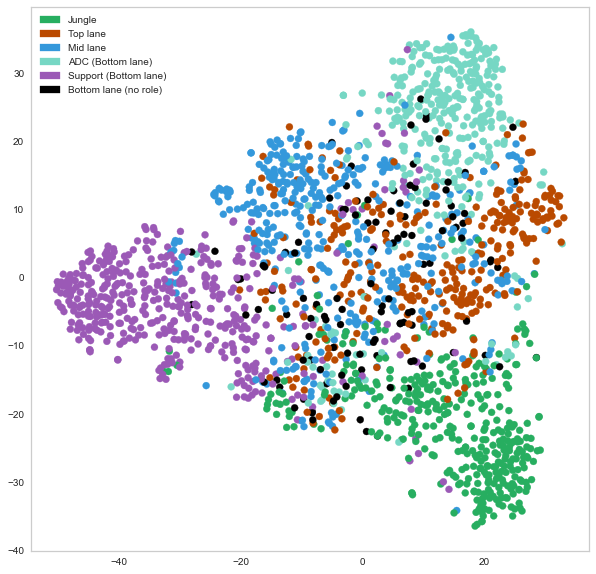

In [14]:
# colored t-SNE visualization according to the most picked role in the last 100 matches
role_colors = []
for i in range(raw_data.shape[0]):
    role = raw_data['Role'][i]
    lane = raw_data['Lane'][i]
    if 'JUNGLE' in lane:
        role_colors.append('#27AE60')
    elif 'TOP' in lane:
        role_colors.append('#BA4A00')
    elif 'MID' in lane:
        role_colors.append('#3498DB')
    elif 'CARRY' in role:
        role_colors.append('#76D7C4')
    elif 'SUPP' in role:
        role_colors.append('#9B59B6')
    elif 'BOTTOM' in lane:
        role_colors.append('black')

plt.figure(figsize=(10, 10))

plt.legend(handles=[
    mpatches.Patch(color='#27AE60', label='Jungle'),
    mpatches.Patch(color='#BA4A00', label='Top lane'),
    mpatches.Patch(color='#3498DB', label='Mid lane'),
    mpatches.Patch(color='#76D7C4', label='ADC (Bottom lane)'),
    mpatches.Patch(color='#9B59B6', label='Support (Bottom lane)'),
    mpatches.Patch(color='black', label='Bottom lane (no role)')
])

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], color=role_colors)

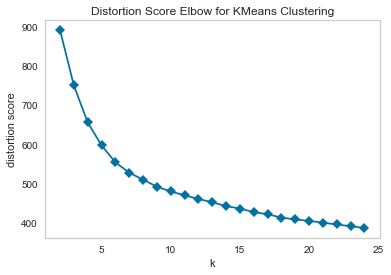

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# elbow method to identify number of clusters + based on the plots above
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,25), timings= False, locate_elbow=False)
visualizer.fit(scaled_data) 
visualizer.show()

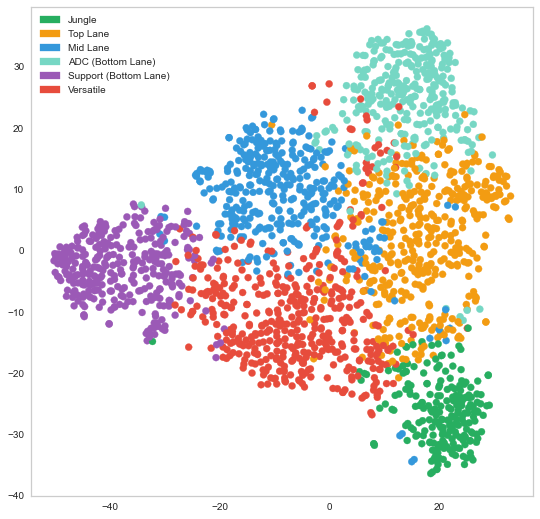

In [16]:
# k-means clustering, results are in accordance with the most picked role
model = KMeans(n_clusters=6, random_state=0)
labels = model.fit_predict(scaled_data)
colors = ['#3498DB', '#76D7C4', '#9B59B6', '#F39C12', '#27AE60', '#E74C3C']
cluster_names = ['Mid Lane', 'ADC (Bottom Lane)', 'Support (Bottom Lane)', 
                 'Top Lane', 'Jungle', 'Versatile']
data_colors = []
for l in labels:
    data_colors.append(colors[l])
plt.figure(figsize=(9, 9))
plt.legend(handles=[
    mpatches.Patch(color='#27AE60', label='Jungle'),
    mpatches.Patch(color='#F39C12', label='Top Lane'),
    mpatches.Patch(color='#3498DB', label='Mid Lane'),
    mpatches.Patch(color='#76D7C4', label='ADC (Bottom Lane)'),
    mpatches.Patch(color='#9B59B6', label='Support (Bottom Lane)'),
    mpatches.Patch(color='#E74C3C', label='Versatile')
])
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], color=data_colors)


In [17]:
# cluster centroids
columns = scaled_data.columns
for i in range(6):
    df = pd.DataFrame(
        dict(
            r=model.cluster_centers_[i],
            theta=columns
        )
    )
    fig = px.line_polar(df, r='r', theta='theta', line_close=True, title=cluster_names[i], range_r=(0, 0.75))
    fig.update_traces(fill='toself')
    fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:257: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])


C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:257: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:257: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:257: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:257: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:257: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

